In [37]:
import numpy as np
from data import gen_binary_data
from protocols.grr import GRR_Client, GRR_Aggregator_MI, GRR_Aggregator_IBU
from sklearn.metrics import mean_squared_error
from protocols.L_GRR import L_GRR_Client, L_GRR_Aggregator_MI, L_GRR_Client_Interaction

In [38]:
n = 100000
data = gen_binary_data(n=n, one_prob=0.3)
k = 2
eps = [0.2, 0.5, 0.9]
num_seed = 10
real_freq = np.unique(data, return_counts=True)[-1] / n
dic_mse = {seed: {
    "GRR": []
} for seed in range(num_seed)}
print(real_freq)
for seed in range(num_seed):
    ep = eps[1]
    grr_reports = [GRR_Client(input_data, k, ep) for input_data in data['v']]
    grr_est_freq = GRR_Aggregator_IBU(grr_reports, k, ep)
    print(f'Estimated frequency at seed: {seed}, epsilon: {ep}, ==> {grr_est_freq}')

    dic_mse[seed]["GRR"].append(grr_est_freq)
est_freq = np.mean([dic_mse[i]['GRR'] for i in range(num_seed)], axis=0)[0]
print(f'Average estimated: {est_freq}')

[0.70389 0.29611]
Estimated frequency at seed: 0, epsilon: 0.5, ==> [0.69533015 0.30466985]
Estimated frequency at seed: 1, epsilon: 0.5, ==> [0.70157713 0.29842287]
Estimated frequency at seed: 2, epsilon: 0.5, ==> [0.71382609 0.28617391]
Estimated frequency at seed: 3, epsilon: 0.5, ==> [0.70851821 0.29148179]
Estimated frequency at seed: 4, epsilon: 0.5, ==> [0.70794659 0.29205341]
Estimated frequency at seed: 5, epsilon: 0.5, ==> [0.70708916 0.29291084]
Estimated frequency at seed: 6, epsilon: 0.5, ==> [0.69353364 0.30646636]
Estimated frequency at seed: 7, epsilon: 0.5, ==> [0.70925314 0.29074686]
Estimated frequency at seed: 8, epsilon: 0.5, ==> [0.70831406 0.29168594]
Estimated frequency at seed: 9, epsilon: 0.5, ==> [0.70647671 0.29352329]
Average estimated: [0.70518649 0.29481351]


In [39]:
freqs = []
k=2
p = np.exp(eps[1]) / (np.exp(eps[1]) + k - 1)
q = (1 - p) / (k - 1)
print(f'p: {p}, q: {q}')
for seed in range(num_seed):
    ep = eps[1]
    grr_reports = [GRR_Client(input_data, k, ep) for input_data in data['v']]

    count_0 = 0
    n = len(grr_reports)
    for i in range(n):
        pb0 = est_freq[0]
        pb1 = est_freq[1]

        if grr_reports[i] == 0:
            numerator = p * pb0
            denominator = numerator + (q * pb1)
            # print(numerator, denominator)
            count_0 += np.random.binomial(1, numerator/denominator)

        if grr_reports[i] == 1:
            numerator = q * pb0
            denominator = numerator + (p * pb1)
            # print(numerator, denominator)
            count_0 += np.random.binomial(1, numerator/denominator)
    
    freqs.append(np.array([count_0, n-count_0])/np.sum(np.array([count_0, n-count_0])))

    


p: 0.6224593312018546, q: 0.3775406687981454


In [40]:
np.average(freqs, axis=0)

array([0.705217, 0.294783])

In [4]:
import numpy as np

eps = 2
eps1 = 1

def get_ps(eps):
    p = np.exp(eps)/(np.exp(eps) + 1)
    q = 1 - p
    return p,q

ps, qs = get_ps(eps)
p1, q1 = get_ps(eps1)

first = p1/q1
second = (ps * p1 + (1-ps)*(1-p1))/ (1-ps-p1+2*p1*ps)
print(first, second)

print(first+second < 2 * second)


2.7182818284590455 1.0
False


In [5]:
0.7 * 0.8 + 0.6 * 0.3

0.74

In [6]:
pb = np.array([0.7, 0.3])
pbstarb = np.array([[1, 2],[3, 4]])
pbb = np.array([
    [[5, 6], [7, 8]],
])

user = np.array([0])

print(pb.shape, pbstarb.shape, pbb.shape)

numerator = np.prod(pb[0], pbstarb[0][0], user[0][0]) +  np.prod(pb[0], pbstarb[1][0], user[0][0])


pbb = np.array([
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
])


(2,) (2, 2) (2, 2, 2)


In [60]:
pbb = np.array([
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
]
)
print(f'PBB: {pbb}')
print('_______')
user = np.array([0,1])

a = pbb[np.arange(len(pbb)),user][:,1]

print(f'A: {a}')
print('****')
print(np.prod(a))


PBB: [[[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]]
_______
A: [ 6 12]
****
72


In [52]:
pbb[0].shape

(2, 2)

In [53]:
pbb = np.array([
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
    
]
)

user = np.array([0,1])

a = []
for i in range(0, len(pbb)):
    a.append(pbb[i][user[i]])

print(a)

[array([5, 6]), array([11, 12])]


In [71]:
pb = np.array([0.7, 0.3])
pbstarb = np.array([[1, 2],[3, 4]])
pbb = pbb = np.array([
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
    ])
user = np.array([0,1])

numerator = pb[0]*pbstarb[0][0]* np.prod(pbb[np.arange(len(pbb)),user][:,0])  + pb[0]*pbstarb[1][0] * np.prod(pbb[np.arange(len(pbb)),user][:,1])
d_b_0 = numerator
d_b_1 = pb[1] * pbstarb[0][1] * np.prod(pbb[np.arange(len(pbb)),user][:,0]) + pb[1] * pbstarb[1][1] * np.prod(pbb[np.arange(len(pbb)),user][:,1])

denominator = d_b_0 + d_b_1

numerator / denominator



0.6137172436104821

In [74]:
num = 0.7 * 1 * 5 * 11 + 0.7 * 3 * 6 * 12
den = num + (  0.3 * 2 * 5 * 11 + 0.3 * 4 * 6 * 12  )
num/den


0.6137172436104821

In [66]:
(  0.3 * 2 * 5 * 9 + 0.3 * 4 * 6 * 12  )

113.39999999999999

In [39]:
pbb = np.array([
    [[5, 6], [7, 8]],
])
print(pbb.shape)
new_array = np.array([[[9, 10], [11, 12]]])
print(new_array.shape)
pbb = np.vstack((pbb, new_array))
print(pbb, pbb.shape)
pbb = np.vstack((pbb, new_array))
print(pbb, pbb.shape)


(1, 2, 2)
(1, 2, 2)
[[[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]] (2, 2, 2)
[[[ 5  6]
  [ 7  8]]

 [[ 9 10]
  [11 12]]

 [[ 9 10]
  [11 12]]] (3, 2, 2)


In [41]:
p_b_bstar = np.array([np.ones((2,2))])
p_b_bstar

array([[[1., 1.],
        [1., 1.]]])

In [58]:
np.random.binomial(1, 0.9)

1

In [7]:
0.6 * 2.6 - 0.4

1.1600000000000001

In [35]:
eps_perm = 2.6
e1 = 0.38
epsilons = np.array([[2.6, e1], [0.8, e1], [0.8, e1], [0.8, e1]])

# epsilons[:,1]
total_loss_minority = np.log((np.exp(eps_perm + epsilons[:,1].sum()) + 1) / (np.exp(eps_perm) + np.exp(epsilons[:,1].sum())))
total_loss_minority

1.243746262157857

In [14]:
1.16/3

0.38666666666666666

In [36]:
eps_perm = 2.6
e1 = 1.52
epsilons = np.array([[2.6, e1]])

# epsilons[:,1]
total_loss_single = np.log((np.exp(eps_perm + epsilons[:,1].sum()) + 1) / (np.exp(eps_perm) + np.exp(epsilons[:,1].sum())))
total_loss_single

1.243746262157857

In [44]:
eps_inf = 2.6
e1 = 0.38
our_epsilons = np.array([[2.6, e1], [0.8, e1], [0.8, e1], [0.8, e1]])

sota_epsilons = [[eps_inf, 1.52]]

our_mechanism_total_loss_for_minority = np.log((np.exp(eps_inf + our_epsilons[:,1].sum()) + 1) / (np.exp(eps_inf) + np.exp(our_epsilons[:,1].sum())))
sota_mechanism_total_loss = np.log((np.exp(eps_inf + 1.52) + 1) / (np.exp(eps_inf) + np.exp(1.52)))
print(our_mechanism_total_loss_for_minority, sota_mechanism_total_loss)

1.243746262157857 1.243746262157857


In [36]:
eps_inf = 1.5
e0 = 1
e1 = 0.05
our_epsilons = np.array([[2.6, e0], [0.8, e1], [0.8, e1], [0.8, e1]])

sotaeps1 = 1.52
sota_epsilons = [[eps_inf, sotaeps1]]

our_mechanism_total_loss_for_minority = np.log((np.exp(eps_inf + our_epsilons[:,1].sum()) + 1) / (np.exp(eps_inf) + np.exp(our_epsilons[:,1].sum())))
sota_mechanism_total_loss = np.log((np.exp(eps_inf + sotaeps1) + 1) / (np.exp(eps_inf) + np.exp(sotaeps1)))
print(our_mechanism_total_loss_for_minority, sota_mechanism_total_loss)

0.962522499702665 1.243746262157857


In [15]:
eps_inf = 1.5
e0 = 1
e1 = 0.05
our_epsilons = np.array([[2.6, e0], [0.8, e1], [0.8, e1], [0.8, e1]])

sotaeps1 = 0.2
sota_epsilons = [[eps_inf, sotaeps1]]

our_mechanism_total_loss_for_minority = np.log((np.exp(eps_inf + our_epsilons[:,1].sum()) + 1) / (np.exp(eps_inf) + np.exp(our_epsilons[:,1].sum())))
sota_mechanism_total_loss = np.log((np.exp(eps_inf + sotaeps1) + 1) / (np.exp(eps_inf) + np.exp(sotaeps1)))
print(our_mechanism_total_loss_for_minority, sota_mechanism_total_loss)

0.6848849182637271 0.12677757555327354


In [1]:
import numpy as np
eps_inf = 2.6
e0 = 0.8
our_epsilons = np.array([[2.6, e0]])
                        
np.log((np.exp(eps_inf + our_epsilons[:,1].sum()) + 1) / (np.exp(eps_inf) + np.exp(our_epsilons[:,1].sum())))

0.6798508598987916

In [66]:
np.log((np.exp(eps_inf+4*e1)+1)/(np.exp(eps_inf)+np.exp(4*e1)))

1.243746262157857

In [ ]:
eps_inf = 2.6 
e1 = 0.8
a = np.exp(eps_inf) + np.exp(3*e1)
b = np.exp(eps_inf + (2 * e1)) + np.exp(e1)

1/a , 1/b

(0.04083813840428816, 0.014511287698639064)

In [105]:
# find e1 from epsilon_\infty and total epsilon
total = 0.8
times = 1

eps_inf = 2
np.log((1-np.exp(total+eps_inf))/(np.exp(total)-np.exp(eps_inf))) * 1/times

1.0956448738559574

In [29]:
import numpy as np
total = 1.243746262157857
times = 2
e0 = 1
eps_inf = 2.6 
( np.log((1-np.exp(total+eps_inf))/(np.exp(total)-np.exp(eps_inf))) - e0) * 1/(times-1)

0.52

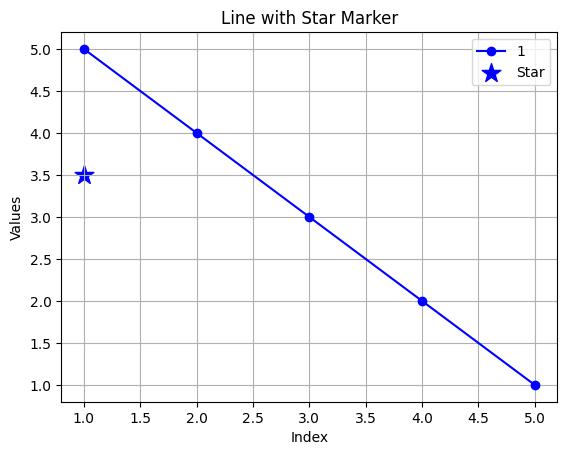

In [110]:
import matplotlib.pyplot as plt

# Define array a and value v
a = [5, 4, 3, 2, 1]
v = 3.5

# Plot the line based on array a
plt.plot(range(1,len(a)+1), a, marker='o', color='blue', label=f'{a[-1]}')

# Mark a star where y-axis corresponds to v
# Mark a star where y-axis corresponds to v
plt.scatter(1, v, color='blue', marker='*', s=200, label='Star')


# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line with Star Marker')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [26]:
np.log(  (np.exp(2.6+1.52) + 1)/(np.exp(2.6)+ np.exp(1.52))    )

1.243746262157857

length: 199999
total below alpha 99
total above alpha 199899


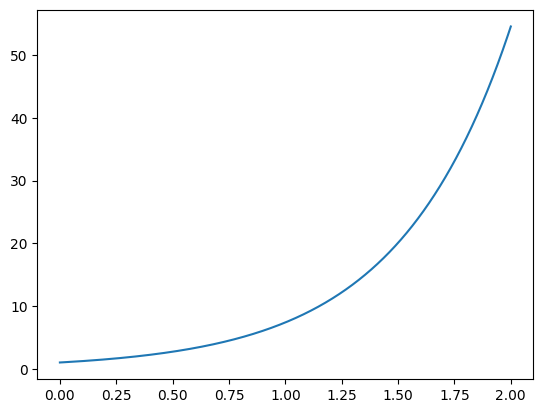

In [31]:
import numpy as np
import matplotlib.pyplot as plt
last = 2
d = np.arange(0.00001, last, 0.00001)

print(f'length: {len(d)}')
alpha = 0.001
print(f'total below alpha {len(d[d<alpha])}')
print(f'total above alpha {len(d[d>alpha])}')

def func(diff):
    
    k1 = 1
    k2 = 1
    k3 = 2
    if diff < alpha:
        return k1 * np.exp(diff)
    else:
        return k2 * np.exp(k3* diff)
r = [func(i) for i in d]


plt.plot(d,r)

In [32]:
np.arange(2)

array([0, 1])

In [14]:
import logging
import os
main_folder = 'yot'

if not os.path.exists(main_folder):
    os.makedirs(main_folder)

log_file = os.path.join(main_folder, 'errors.log')


logging.basicConfig(filename=log_file, level=logging.INFO)

logging.info('hehedd')

In [72]:
import json
def parse_baseline_errors_temp(file):
    i = 1
    f = open(file)
    array_in_string = []
    for line in f.readlines():
        if i % 4 == 0 :
            array_in_string.append(json.loads(line.split(':')[2]))
        i += 1
    print(array_in_string)
    print(len(array_in_string))
    np_array = np.array(array_in_string)
    print(np.shape(np_array))
    np_array = np.delete(np_array, [0,2,4,6], axis=1)
    print(np.shape(np_array))
    minority_probs = [0.1, 0.3, 0.4, 0.49]
    average_errors = np.average(np_array, axis=0)
    print(average_errors)
    minority_error = {minority_probs[i]: f'{average_errors[i]:.7f}' for i in range(len(minority_probs))}
    print(minority_error)
    return minority_error


def parse_lgrr_errors_temp(file):
    i = 1
    f = open(file)
    array_in_string = []
    for line in f.readlines():
        if i < 3:
            i += 1
            continue
        if (i+1) % 4 == 0:
            array_in_string.append(json.loads(line.split(':')[2]))
        i += 1

    np_array = np.array(array_in_string)
    print(array_in_string[0])
    print(array_in_string[-1])
    print(np.shape(np_array))
    minority_probs = [0.1, 0.3, 0.4, 0.49]
    average_errors = np.average(np_array, axis=0)
    minority_error = {minority_probs[i]: f'{average_errors[i]:.7f}' for i in range(len(minority_probs))}
    print(np_array)
    print(minority_error)
    return minority_error
file = 'experiment11/errors.log'
baseline_errors = parse_baseline_errors_temp(file)
lgrr_errors = parse_lgrr_errors_temp(file)    

[[0.0, 1.046667870939891e-06, 0.0, 2.565695781700385e-06, 0.0, 3.1814897480686186e-06, 0.0, 3.0960403950704327e-06], [0.0, 1.0139054552793086e-06, 0.0, 3.5590307500390415e-06, 0.0, 2.9898073531283963e-06, 0.0, 0.003947510462063113], [0.0, 1.0005728437580719e-06, 0.0, 2.5516840352997674e-06, 0.0, 3.144883272283311e-06, 0.0, 3.880096418474345e-06], [0.0, 1.06629072142527e-06, 0.0, 2.4979475445303933e-06, 0.0, 2.5804441924805312e-06, 0.0, 3.059201739711803e-06], [0.0, 1.0363289723407486e-06, 0.0, 3.7221036377103607e-06, 0.0, 2.9898408962959663e-06, 0.0, 2.0437897963464035e-06], [0.0, 1.144237507605411e-06, 0.0, 2.201565021105841e-06, 0.0, 3.530402422659422e-06, 0.0, 3.257500745686459e-06], [0.0, 9.275584594959692e-07, 0.0, 3.7698773984178296e-06, 0.0, 3.913508884754092e-06, 0.0, 0.004515782512925367], [0.0, 1.146071865103685e-06, 0.0, 3.825682697500413e-06, 0.0, 4.058942513239584e-06, 0.0, 3.138975823412445e-06], [0.0, 8.961715894215289e-07, 0.0, 2.54464201696011e-06, 0.0, 5.0796903660054

In [73]:
baseline_errors

{0.1: '0.0000010', 0.3: '0.0000033', 0.4: '0.0000037', 0.49: '0.0004347'}

In [74]:
lgrr_errors

{0.1: '0.0003601', 0.3: '0.0004006', 0.4: '0.0003935', 0.49: '0.0003957'}

In [83]:
import re
from collections import defaultdict
def parse_errors_based_on_interactions(file):
    i = 1
    f = open(file)
    array_in_string = []
    title = 'epsilon0'
    hm = defaultdict(dict)
    minority_probs = [0.1, 0.3, 0.4, 0.49]
    for line in f.readlines():
        if title in line:
            # Define the patterns for epsilon0 and interactions
            epsilon0_pattern = r'epsilon0:\s*([\d.]+)'
            interactions_pattern = r'interactions:\s*(\d+)'

            # Search for the patterns in the string
            epsilon0_match = re.search(epsilon0_pattern, line)
            interactions_match = re.search(interactions_pattern, line)

            # Extract the values
            epsilon0_value = epsilon0_match.group(1) if epsilon0_match else None
            interactions_value = interactions_match.group(1) if interactions_match else None
            # print(epsilon0_value, interactions_value)
            if interactions_value not in hm[epsilon0_value]:
                hm[epsilon0_value][interactions_value] = []
        
        else:
            str_array = json.loads(line.split(':')[2])
            if np.array(str_array).ndim == 1: continue
            ### figure purpose



            ### printing purpose
            
             




hm = parse_errors_based_on_interactions(file)
print(hm)


defaultdict(<class 'dict'>, {'0.6': {'2': [34, 234]}})


In [84]:
np.exp(0.1)

1.1051709180756477

In [103]:
a = np.array([0.9,0.1])
b = np.array([0.89, 0.11])

print(abs(0.89-0.9)/0.9)

print((abs(b-a)/a) * 100)

0.01111111111111112
[ 1.11111111 10.        ]


In [88]:
c = np.array([[0.9,0.1],[0.89, 0.11]])
d = np.array([0.7,0.3])

np.dot(d,c)

array([0.897, 0.103])

In [89]:
np.array([a,b])

array([[0.9 , 0.1 ],
       [0.89, 0.11]])

In [90]:
c

array([[0.9 , 0.1 ],
       [0.89, 0.11]])

In [94]:
a= 0.6668319751834157 - 0.4
print(a)
print(a/7)

0.2668319751834157
0.03811885359763082


In [132]:
np.exp(0.2)/(np.exp(0.2)+1)

0.549833997312478

In [98]:
0.2/20

0.01

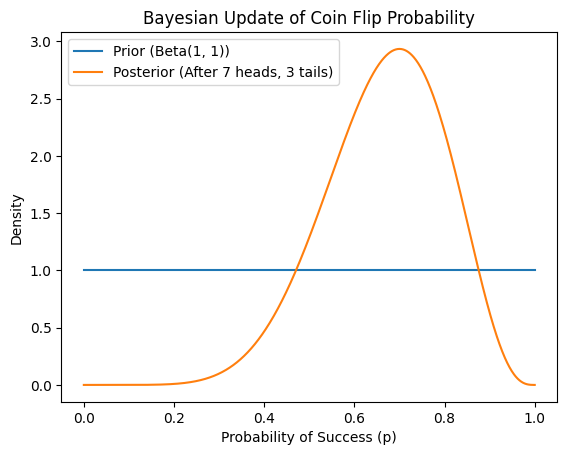

In [104]:
import numpy as np
from scipy.stats import beta

# Prior parameters
alpha_prior = 1
beta_prior = 1

# Data - 7 heads, 3 tails
heads = 7
tails = 3

# Bayesian updating - Compute posterior parameters
alpha_posterior = alpha_prior + heads
beta_posterior = beta_prior + tails

# Generate grid of values for plotting
x = np.linspace(0, 1, 1000)

# Prior and posterior distributions
prior = beta.pdf(x, alpha_prior, beta_prior)
posterior = beta.pdf(x, alpha_posterior, beta_posterior)

# Plotting
import matplotlib.pyplot as plt

plt.plot(x, prior, label='Prior (Beta(1, 1))')
plt.plot(x, posterior, label='Posterior (After 7 heads, 3 tails)')
plt.xlabel('Probability of Success (p)')
plt.ylabel('Density')
plt.title('Bayesian Update of Coin Flip Probability')
plt.legend()
plt.show()

In [126]:
def generate_descending_list(value, first):
    result = [first]
    current_value = first
    remaining = value - first
    threshold = 0.1
    # Iterate until the current value is greater than 0.6
    while True:
        current_value *= 0.6  # Decrease the current value by 60%
        remaining -= current_value
        if current_value + sum(result) > value:
            result.append(current_value + remaining)
            break
        elif current_value < threshold:
            result[-1] = result[-1] + current_value
            break
        result.append(current_value)
        
        
    print(remaining)
    if remaining > 0:
        result.append(remaining)
    return result

# Example usage:
value = 20
first = 8
output_list = generate_descending_list(value, first)
print(output_list, sum(output_list))


0.12093235200000067
[8, 4.8, 2.88, 1.728, 1.0368, 0.62208, 0.37324799999999997, 0.22394879999999998, 0.21499084799999996, 0.12093235200000067] 20.0


In [111]:
4.8 * 0.6

2.88